In [76]:
import pandas as pd

In [77]:
df = pd.read_csv("exoplanet_data.csv")

In [78]:
df.drop(df[df.koi_disposition == "CANDIDATE"].index , inplace=True)

In [79]:
# Set features. This will also be used as x values. Here all of the columns except "koi_disposition" are selected as features. 
selected_features = df.drop("koi_disposition", axis=1)
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [80]:
#df = df.replace(["CONFIRMED","FALSE POSITIVE"],[1,0])

In [81]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df,
    table_name='exo_planet')

In [82]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

/Users/piercest/anaconda3/lib/python3.11/site-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [139]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=100)

In [140]:
synthetic_data

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,1,0,0,5.156170,3.400000e-08,-4.870000e-07,126.635243,0.000009,...,-191,4.360,0.358,-0.157,0.834,0.270,-0.229,293.75585,43.546090,6.966
1,FALSE POSITIVE,0,0,1,0,0.314691,2.100000e-08,-1.100000e-08,125.446850,0.000009,...,-158,4.145,0.203,-0.146,2.098,0.351,-0.450,294.73958,42.917180,6.966
2,FALSE POSITIVE,1,0,0,1,0.372064,6.900000e-08,-1.174000e-06,141.602311,0.002867,...,-162,3.892,0.171,-0.250,4.144,0.794,-0.579,298.04254,43.714219,6.966
3,FALSE POSITIVE,0,0,1,1,0.302878,1.530000e-07,-1.610000e-07,123.042605,0.013315,...,-63,4.624,0.031,-0.049,0.809,0.077,-0.031,295.22530,44.887236,6.966
4,FALSE POSITIVE,1,1,0,0,7.032363,2.400000e-08,-1.630000e-07,135.665789,0.000009,...,-252,4.734,0.122,-0.078,0.284,0.055,-0.062,283.30387,46.919127,6.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FALSE POSITIVE,0,1,1,0,0.365973,2.100000e-08,-4.300000e-08,121.255258,0.000949,...,-108,4.560,0.068,-0.086,0.652,0.076,-0.115,296.24694,47.743666,6.966
96,CONFIRMED,0,0,0,0,238.478299,1.030412e-02,-1.245582e-03,247.043432,0.021146,...,-76,3.907,0.176,-0.098,1.788,0.316,-0.311,287.34433,43.491133,6.966
97,CONFIRMED,0,0,0,0,4.057849,2.690000e-07,-3.736000e-06,134.999903,0.000732,...,-154,3.842,0.333,-0.181,2.131,0.611,-0.351,285.76788,43.101339,6.966
98,FALSE POSITIVE,0,1,1,0,154.128797,2.383015e-03,-4.858060e-04,183.501602,0.005164,...,-207,4.322,0.161,-0.086,1.218,0.213,-0.241,283.28921,40.914241,6.966


In [141]:
import joblib
filename = 'SVC_model.sav'
svm_grid_model = joblib.load(filename)

In [142]:
# Set features. This will also be used as x values. Here all of the columns except "koi_disposition" are selected as features. 
selected_features = synthetic_data.drop("koi_disposition", axis=1)
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,0,0,5.156170,3.400000e-08,-4.870000e-07,126.635243,0.000009,-0.000009,...,-191,4.360,0.358,-0.157,0.834,0.270,-0.229,293.75585,43.546090,6.966
1,0,0,1,0,0.314691,2.100000e-08,-1.100000e-08,125.446850,0.000009,-0.000009,...,-158,4.145,0.203,-0.146,2.098,0.351,-0.450,294.73958,42.917180,6.966
2,1,0,0,1,0.372064,6.900000e-08,-1.174000e-06,141.602311,0.002867,-0.000018,...,-162,3.892,0.171,-0.250,4.144,0.794,-0.579,298.04254,43.714219,6.966
3,0,0,1,1,0.302878,1.530000e-07,-1.610000e-07,123.042605,0.013315,-0.001698,...,-63,4.624,0.031,-0.049,0.809,0.077,-0.031,295.22530,44.887236,6.966
4,1,1,0,0,7.032363,2.400000e-08,-1.630000e-07,135.665789,0.000009,-0.000009,...,-252,4.734,0.122,-0.078,0.284,0.055,-0.062,283.30387,46.919127,6.966


In [143]:
synthetic_data = synthetic_data.replace(["CONFIRMED","FALSE POSITIVE"],[1,0])

In [144]:
X = selected_features
y = pd.DataFrame(synthetic_data["koi_disposition"],index = synthetic_data.index)

In [145]:
X.shape

(100, 40)

In [146]:
y.shape

(100, 1)

In [147]:
scaler_filename = "scaler.save"

scaler = joblib.load(scaler_filename) 

In [148]:
X_scaled = scaler.transform(X)


/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [149]:
model = joblib.load("SVC_model.sav")

In [150]:
prediction = model.predict(X_scaled)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        73
           1       0.48      0.56      0.52        27

    accuracy                           0.72       100
   macro avg       0.65      0.67      0.66       100
weighted avg       0.73      0.72      0.73       100



/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

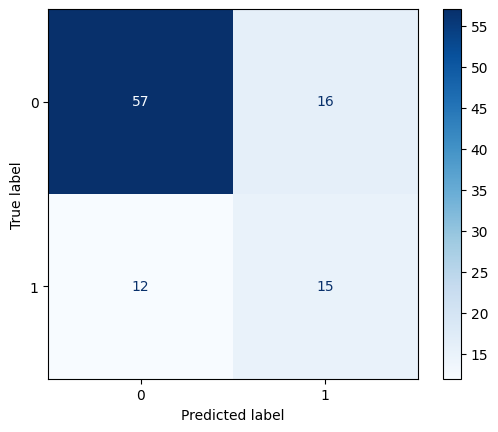

In [151]:
# Evaluate the model
print(classification_report(y, prediction))

# Compute confusion matrix
cm = confusion_matrix(y, prediction, labels=model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [152]:
y

,koi_disposition
0,1
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,1
98,0


In [153]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,0,0,5.156170,3.400000e-08,-4.870000e-07,126.635243,0.000009,-0.000009,...,-191,4.360,0.358,-0.157,0.834,0.270,-0.229,293.75585,43.546090,6.966
1,0,0,1,0,0.314691,2.100000e-08,-1.100000e-08,125.446850,0.000009,-0.000009,...,-158,4.145,0.203,-0.146,2.098,0.351,-0.450,294.73958,42.917180,6.966
2,1,0,0,1,0.372064,6.900000e-08,-1.174000e-06,141.602311,0.002867,-0.000018,...,-162,3.892,0.171,-0.250,4.144,0.794,-0.579,298.04254,43.714219,6.966
3,0,0,1,1,0.302878,1.530000e-07,-1.610000e-07,123.042605,0.013315,-0.001698,...,-63,4.624,0.031,-0.049,0.809,0.077,-0.031,295.22530,44.887236,6.966
4,1,1,0,0,7.032363,2.400000e-08,-1.630000e-07,135.665789,0.000009,-0.000009,...,-252,4.734,0.122,-0.078,0.284,0.055,-0.062,283.30387,46.919127,6.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,0.365973,2.100000e-08,-4.300000e-08,121.255258,0.000949,-0.000009,...,-108,4.560,0.068,-0.086,0.652,0.076,-0.115,296.24694,47.743666,6.966
96,0,0,0,0,238.478299,1.030412e-02,-1.245582e-03,247.043432,0.021146,-0.022877,...,-76,3.907,0.176,-0.098,1.788,0.316,-0.311,287.34433,43.491133,6.966
97,0,0,0,0,4.057849,2.690000e-07,-3.736000e-06,134.999903,0.000732,-0.000009,...,-154,3.842,0.333,-0.181,2.131,0.611,-0.351,285.76788,43.101339,6.966
98,0,1,1,0,154.128797,2.383015e-03,-4.858060e-04,183.501602,0.005164,-0.000048,...,-207,4.322,0.161,-0.086,1.218,0.213,-0.241,283.28921,40.914241,6.966


In [164]:
import pandas as pd

# Assuming prediction and y are already defined
equal_values = []

for i in range(100):
    if prediction[i] == y.values[i][0]:
        print(i)
        equal_values.append({
            'y_value': y.iloc[i].to_dict(),  # Convert Series to dict for JSON
            'X_value': X.iloc[i].to_dict()   # Convert Series to dict for JSON
        })

# Convert to DataFrame for saving to CSV
equal_values_df = pd.DataFrame(equal_values)



1
2
3
4
6
8
9
10
11
12
13
14
15
16
17
18
19
22
23
24
25
26
27
31
32
33
34
35
38
39
41
42
44
45
47
49
50
52
54
55
56
61
62
64
65
67
68
69
70
71
74
75
76
77
78
80
81
84
85
86
87
88
89
90
91
92
94
95
96
97
98
99


In [165]:
equal_values_df

,y_value,X_value
0,{'koi_disposition': 0},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 0.0, '..."
1,{'koi_disposition': 0},"{'koi_fpflag_nt': 1.0, 'koi_fpflag_ss': 0.0, '..."
2,{'koi_disposition': 0},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 0.0, '..."
3,{'koi_disposition': 0},"{'koi_fpflag_nt': 1.0, 'koi_fpflag_ss': 1.0, '..."
4,{'koi_disposition': 0},"{'koi_fpflag_nt': 1.0, 'koi_fpflag_ss': 0.0, '..."
...,...,...
67,{'koi_disposition': 0},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 1.0, '..."
68,{'koi_disposition': 1},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 0.0, '..."
69,{'koi_disposition': 1},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 0.0, '..."
70,{'koi_disposition': 0},"{'koi_fpflag_nt': 0.0, 'koi_fpflag_ss': 1.0, '..."


In [166]:
equal_values_df.to_json('synthetic_generated_data.json', orient='records', lines=True)